In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

## timeseries package
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import timedelta
from numpy import log

In [6]:
df = pd.read_csv(r"gold_rate_history.csv")
df.shape

(4971, 6)

In [7]:
print(df.columns)

Index(['Date', 'Country', 'State', 'Location', 'Pure Gold (24 k)',
       'Standard Gold (22 K)'],
      dtype='object')


In [8]:
print(f"The dataset available for State: {df['State'].unique()[0]} and City: {df['Location'].unique()[0]}")

The dataset available for State: Tamilnadu and City: Chennai


In [9]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [10]:
print(f'The date ranging from {df["Date"].min()} to {df["Date"].max()}')

The date ranging from 2006-01-02 00:00:00 to 2020-10-10 00:00:00


In [11]:
df["Pure Gold (24 k)"] = df["Pure Gold (24 k)"].astype(np.float)
df["Standard Gold (22 K)"] = df["Standard Gold (22 K)"].astype(np.float)

C:\Users\SHALINI\AppData\Local\Temp/ipykernel_18032/3178451523.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["Pure Gold (24 k)"] = df["Pure Gold (24 k)"].astype(np.float)
C:\Users\SHALINI\AppData\Local\Temp/ipykernel_18032/3178451523.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["Standard Gold (22 K)"] = df["Standard Gol

In [12]:
df.index = df.Date

How Gold price has increased over a decade?

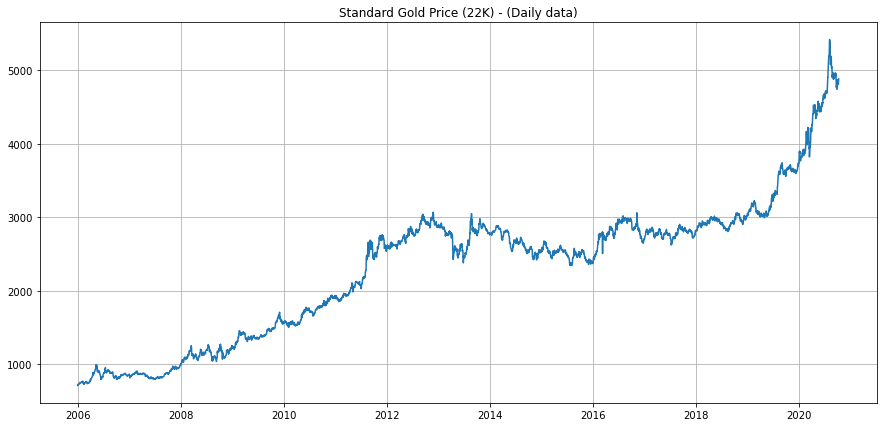

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(df['Standard Gold (22 K)'])
plt.title('Standard Gold Price (22K) - (Daily data)')
plt.grid(True)
plt.show()


ARIMA model

In [14]:
result = adfuller(df['Standard Gold (22 K)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.542589
p-value: 0.986112


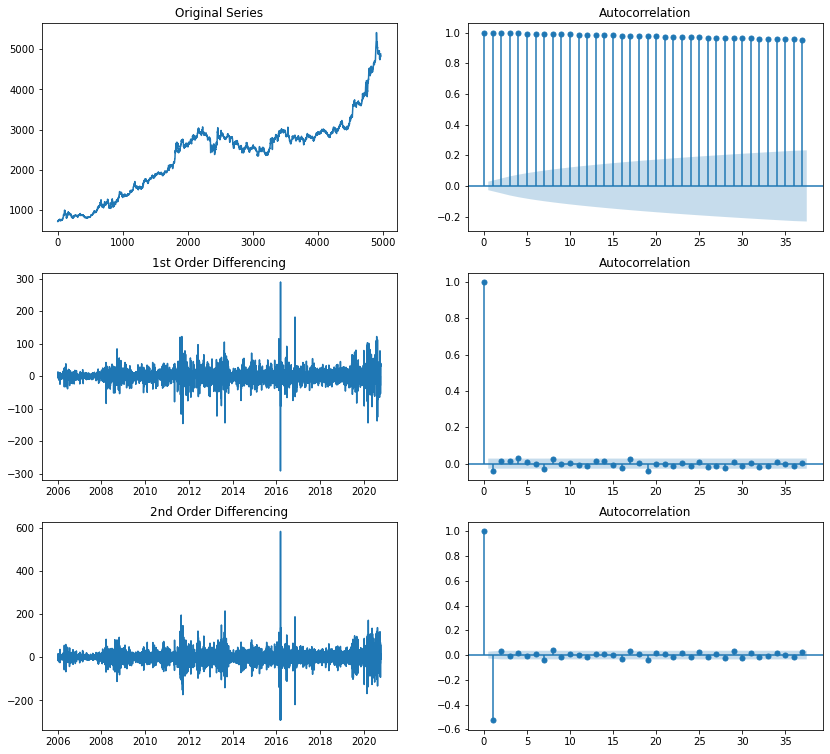

In [15]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)

fig.set_size_inches(14,13)

axes[0, 0].plot(df['Standard Gold (22 K)'].values); axes[0, 0].set_title('Original Series')
plot_acf(df['Standard Gold (22 K)'].values, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(df['Standard Gold (22 K)'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Standard Gold (22 K)'].diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df['Standard Gold (22 K)'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Standard Gold (22 K)'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


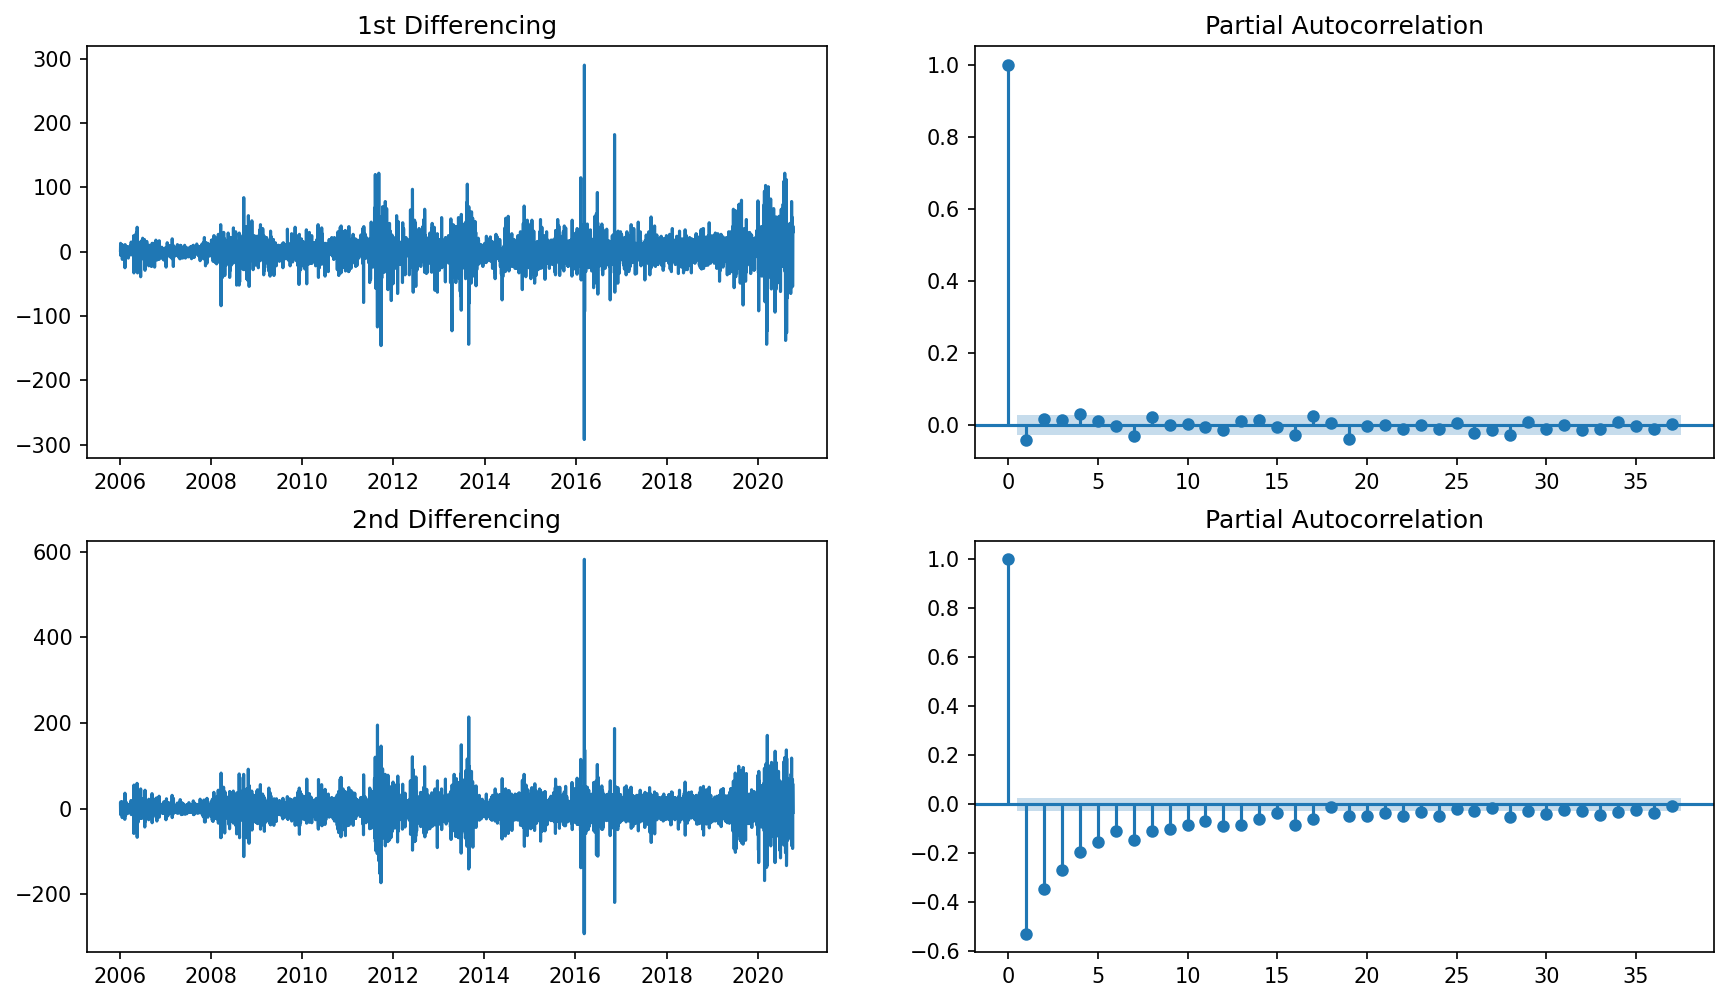

In [16]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(14,8), 'figure.dpi':150})

## first order differencing
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(df['Standard Gold (22 K)'].diff()); axes[0, 0].set_title('1st Differencing')
plot_pacf(df['Standard Gold (22 K)'].diff().dropna(), ax=axes[0, 1])

## second order differencing
axes[1, 0].plot(df['Standard Gold (22 K)'].diff().diff()); axes[1, 0].set_title('2nd Differencing')
plot_pacf(df['Standard Gold (22 K)'].diff().diff().dropna(), ax=axes[1, 1])
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df['Standard Gold (22 K)'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                               ARIMA Model Results                                
Dep. Variable:     D.Standard Gold (22 K)   No. Observations:                 4970
Model:                     ARIMA(1, 1, 2)   Log Likelihood              -21997.036
Method:                           css-mle   S.D. of innovations             20.227
Date:                    Fri, 21 Oct 2022   AIC                          44004.072
Time:                            20:37:38   BIC                          44036.627
Sample:                                 1   HQIC                         44015.485
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.8397      0.295      2.846      0.004       0.261       1.418
ar.L1.D.Standard Gold (22 K)     0.6750      

In [18]:
# Create Training and Test
train = df['Standard Gold (22 K)'][:-200]
test = df['Standard Gold (22 K)'][-200:]

print(train.shape, test.shape)

(4771,) (200,)


In [19]:
# Build Model
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(test.shape[0], alpha=0.05)  # 95% conf

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [20]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

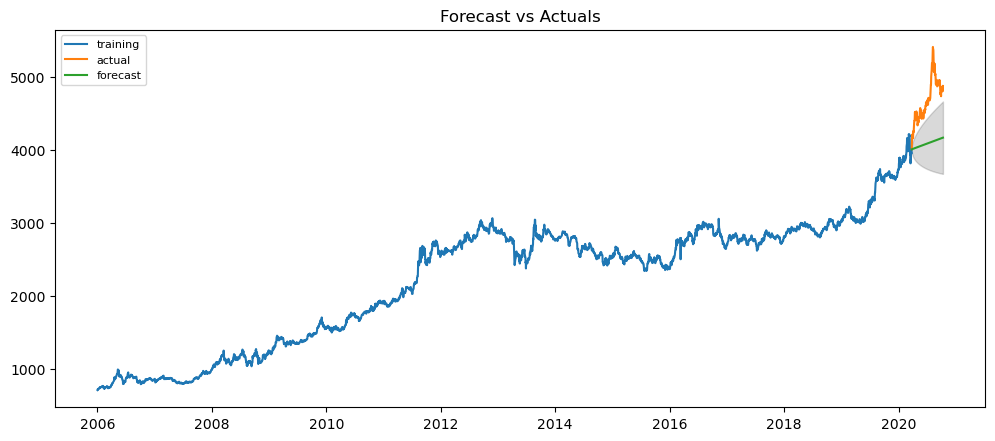

In [21]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Create Lag Feature

In [22]:
NO_OF_LAG_DAYS = 14

In [23]:
def create_lag_feature(df, no_of_days):
    
    for day in range(1, no_of_days+1):
        df[f"lag_{day}"] = df["Standard Gold (22 K)"].shift(day)
        
    return df

In [24]:
df_features = create_lag_feature(df, NO_OF_LAG_DAYS)

In [25]:
lag_features =  [ col for col in df_features.columns if "lag" in col]
print(lag_features)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14']


In [26]:
df_lag_features = df_features[lag_features + ['Standard Gold (22 K)']].dropna()
df_lag_features.columns

Index(['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'Standard Gold (22 K)'],
      dtype='object')

In [27]:
NUM_PREDICTION = 500
train_df = df_lag_features[:-NUM_PREDICTION]
test_df = df_lag_features[-NUM_PREDICTION:]

print(train_df.shape, test_df.shape)

(4457, 15) (500, 15)


Regression model

In [28]:

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [29]:
model = mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=12,
                           max_iter=100, random_state=5,
                           activation="relu") 

In [30]:
X_train_df = train_df[lag_features]
X_test_df = test_df[lag_features]

In [31]:
model.fit(X_train_df, train_df['Standard Gold (22 K)'])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=12, max_iter=100, random_state=5,
             solver='lbfgs')

In [32]:
predicted_price = model.predict(X_test_df)
test_df["22K Gold Predicted_Price"] = predicted_price

C:\Users\SHALINI\AppData\Local\Temp/ipykernel_18032/2743783829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["22K Gold Predicted_Price"] = predicted_price


In [33]:
test_df[["Standard Gold (22 K)", "22K Gold Predicted_Price"]].head()

,Standard Gold (22 K),22K Gold Predicted_Price
Date,,
2019-05-30,3031.0,3048.156636
2019-05-31,3062.0,3036.153332
2019-06-01,3079.0,3058.970829
2019-06-02,3079.0,3073.198967
2019-06-03,3076.0,3079.607110


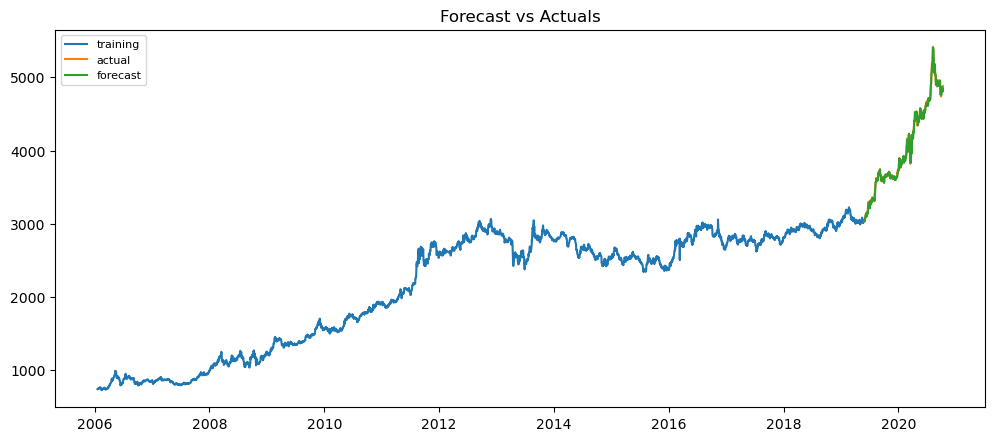

In [34]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df['Standard Gold (22 K)'], label='training')
plt.plot(test_df['Standard Gold (22 K)'], label='actual')
plt.plot(test_df['22K Gold Predicted_Price'], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
print(f"RMSE {mean_squared_error(test_df['Standard Gold (22 K)'], test_df['22K Gold Predicted_Price'], squared= False)}")

RMSE 34.87302413254547


Prediction Vs Actual

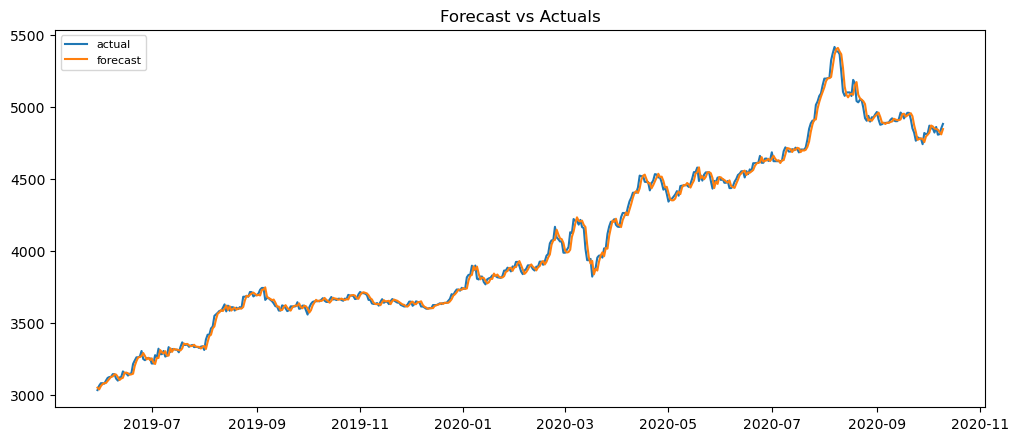

In [36]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_df['Standard Gold (22 K)'][-NUM_PREDICTION:], label='actual')
plt.plot(test_df['22K Gold Predicted_Price'][-NUM_PREDICTION:], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()